# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [64]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
1735 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 1735
Submissions graded.


### Dataset

In [65]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [66]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [67]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [68]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [69]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1532 student submissions.



### Institutions

Institution
Norges teknisk-naturvitenskapelige universitet (NTNU)    706
Universitetet i Stavanger (UiS)                          329
Universitetet i Oslo (UiO)                               212
Universtitetet i Bergen (UiB)                            159
Høgskolen i Østfold                                       95
Høgskulen på Vestlandet (HVL)                             28
Name: count, dtype: int64


<Axes: ylabel='count'>

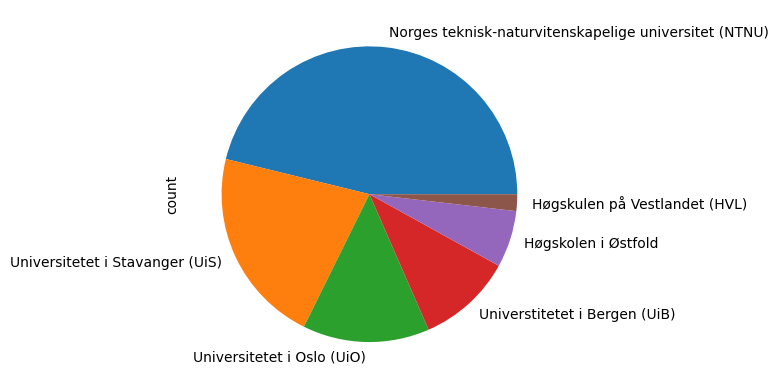

In [70]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024     386
2023     320
2022     298
2021     112
2019      75
2020      64
2018      33
2017      27
2015      20
2014      20
2016      11
2012      10
2005       7
Annet      6
2011       4
2007       4
2010       3
2009       3
2008       2
2006       2
Name: count, dtype: int64


<Axes: ylabel='count'>

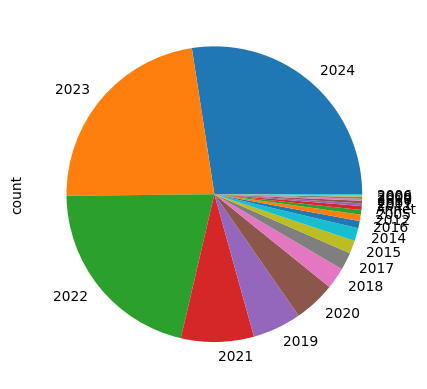

In [71]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    919
f    498
     115
Name: count, dtype: int64
Gender
m    0.599869
f    0.325065
     0.075065
Name: proportion, dtype: float64


<Axes: ylabel='count'>

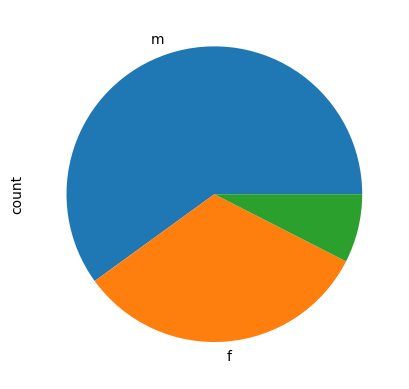

In [72]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [73]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

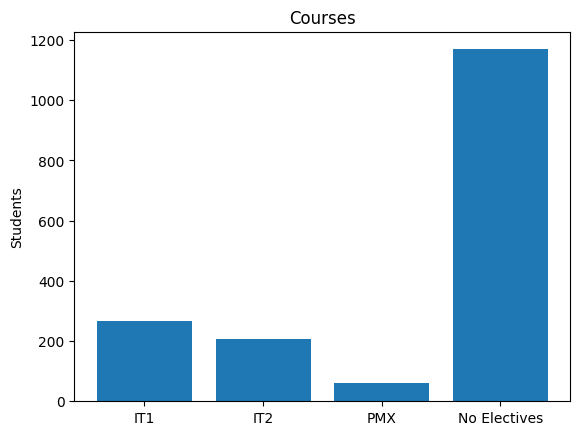

In [74]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

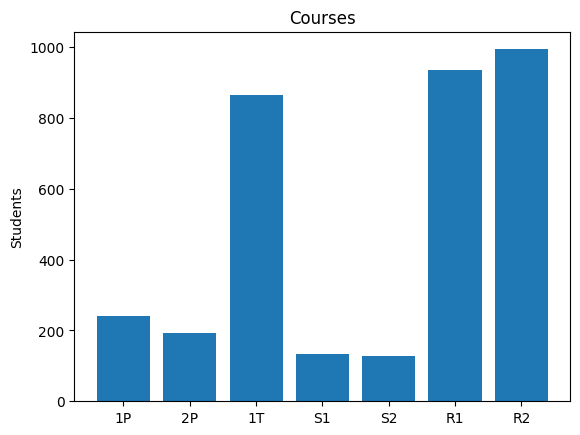

In [75]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    1174
Ja      354
Name: count, dtype: int64
OutsideExperience
Nei    0.768325
Ja     0.231675
Name: proportion, dtype: float64


<Axes: ylabel='count'>

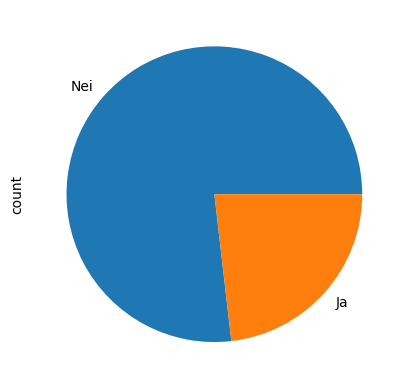

In [76]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [77]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 22.709
Standard deviation: 16.559


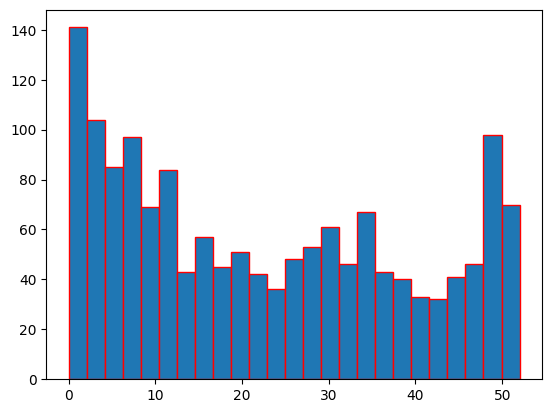

In [78]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

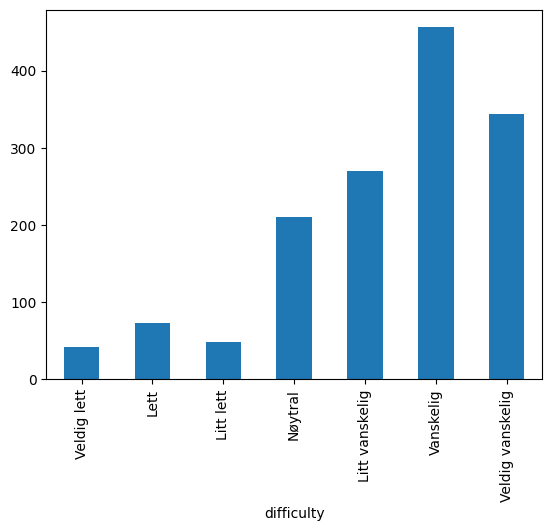

In [79]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [80]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023 and 2024: 30.485
Standard deviation of 2023 and 2024: 15.346

Mean of before 2023: 17.502
Standard deviation of before 2023: 15.552


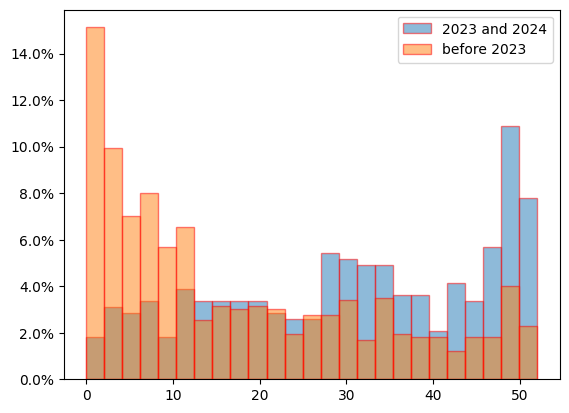

In [81]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### Gender

Mean of women: 16.737
Standard deviation of women: 14.761

Mean of men: 25.82
Standard deviation of men: 16.634


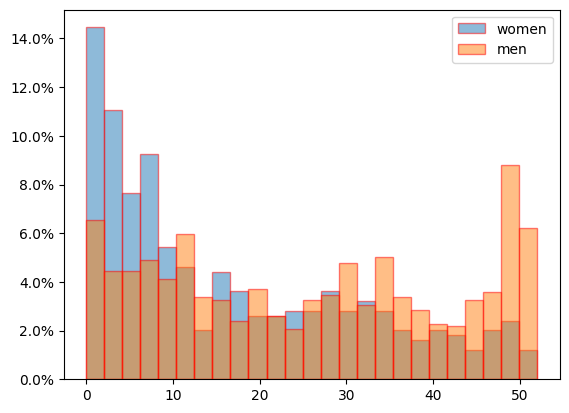

In [82]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [83]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [84]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       53.31 %
Booleans        61.89 %
Variables       51.92 %
Conditionals    56.76 %
Loops           29.17 %
Lists           33.01 %
Functions       21.53 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [85]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [86]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    769
0    763
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             769
Jeg vet ikke    523
str              96
float            72
list             39
bool             26
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    769
0    763
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           769
Jeg vet ikke    533
int             106
str              72
bool             33
list              8
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    860
1    672
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             672
Jeg vet ikke    633
int              67
float            66
bool             61
list             16
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    1057
0     475
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            1057
Jeg vet ikke    

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [87]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    1262
0     270
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            1262
I don't know     169
12.0              19
1212.0             9
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [88]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    1048
0     484
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           1048
I don't know     257
13.0               8
12.23              5
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [89]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    1040
1     492
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        492
I don't know    377
246.0           146
123.0             8
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [90]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    968
0    564
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             968
I don't know    309
1.0              83
3.0              33
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [91]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    1062
1     470
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    569
bca             460
'bca'            14
abc              14
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [92]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    892
0    640
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0      892
10.0       82
1.0         4
30.0        3
15.0        2
0.5         1
10.2        1
220.0       1
1020.0      1
80.0        1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    893
0    639
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            893
I don't know    546
10.0             68
2.0               3
15.0              2
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [93]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    845
0    687
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    845
20.0     83
2.0       3
40.0      1
30.0      1
0.5       1
0.0       1
1.0       1
80.0      1
15.0      1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    829
0    703
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            829
I don't know    582
20.0             95
1.0               3
30.0              2
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [94]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    825
0    707
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    825
10.0     69
30.0      3
29.0      1
1.0       1
0.5       1
0.0       1
15.0      1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0    807
1    725
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            725
I don't know    620
10.0            161
2.0               1
1.0               1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [95]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0    800
1    732
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
 10.0    732
 20.0    135
 1.0       2
 40.0      2
 10.2      1
-10.0      1
 30.0      1
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
1    778
0    754
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            778
I don't know    635
20.0             89
2.0               2
30.0              2
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [96]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    810
0    722
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    810
10.0     45
30.0     44
1.0       3
0.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    843
0    689
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
 30.0    843
 20.0     26
 10.0     23
 2.0       2
 15.0      2
 3.0       1
-10.0      1
 1.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    837
0    695
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            837
I don't know    612
10.0             24
20.0             22
3.0               2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [97]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    807
0    725
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    807
20.0     35
10.0     25
6.0       1
60.0      1
5.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    869
1    663
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
 30.0    663
 10.0    171
 20.0     31
 0.0       1
-20.0      1
 40.0      1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    876
1    656
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            656
I don't know    630
20.0            147
10.0             60
60.0              2
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [98]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            1227
Jeg vet ikke     243
False             35
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           1345
Jeg vet ikke     113
True              47
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            1120
Jeg vet ikke     199
False            183
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           1314
Jeg vet ikke     130
True              52
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            1290
Jeg vet ikke     141
False             72
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           1201
Jeg vet ikke     261
True              42
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [99]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           825
Jeg vet ikke    621
True             55
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           1128
Jeg vet ikke     323
True              51
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            783
Jeg vet ikke    418
False           298
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            1118
Jeg vet ikke     335
False             40
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            909
Jeg vet ikke    418
False           170
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    830
True            601
False            73
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [100]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    759
False           671
True             65
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    771
False           631
True             88
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    738
True            674
False            73
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            748
Jeg vet ikke    665
False            77
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    700
True            599
False           187
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    894
True            481
False           115
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [101]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            1210
Jeg vet ikke     195
False             94
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           1128
Jeg vet ikke     343
True              28
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           1121
Jeg vet ikke     272
True             100
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            865
Jeg vet ikke    343
False           281
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            1062
Jeg vet ikke     321
False            117
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           703
Jeg vet ikke    622
True            170
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [102]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    1033
0     499
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       1033
Jeg vet ikke     274
1                207
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [103]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    779
1    753
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               753
Jeg vet ikke    578
1               102
1 og 2           47
Ingenting        33
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [104]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    851
0    681
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               851
Jeg vet ikke    420
2 og 3           89
3                46
1 og 2           39
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [105]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    841
0    691
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          841
Jeg vet ikke    427
1               100
1, 2 og 3        36
1 og 3           33
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [106]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    1025
1     507
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            507
I don't know    455
1.0             183
9.0             161
123456789.0      84
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [107]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    1063
1     469
Name: count, dtype: int64

Top 5 most common answers:
Loops2
I don't know    469
10.0            469
2.0             179
8.0             144
2468.0           83
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [108]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    815
1    717
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             717
I don't know    601
0                52
102              43
98                6
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [109]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    1118
1     414
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    602
4.0             414
3.0             128
1.0             125
0.0              63
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [110]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    1143
1     389
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    988
5.0             389
0.0              27
113.0            16
3.0              14
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [111]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    1190
1     342
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    1013
9.0              342
0.0               36
-14.0             11
-5.0              11
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [112]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    1086
1     446
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    666
20.0            446
10.0            326
102030.0         30
60.0              7
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [113]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    1093
1     439
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    706
25.0            439
15.0            287
152535.0         12
65.0              7
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [114]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
0    787
1    745
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    745
Jeg vet ikke    603
[15, 35, 55]     42
[5, 15, 25]      15
[10, 35, 30]      7
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    1139
1     393
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    754
[5, 35, 25]     393
[15, 35, 55]    197
[5, 15, 25]      72
[10, 35, 30]     20
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [115]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    869
1    663
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    778
15.0            663
5.1              16
510.0            10
9.0               1
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [116]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    1084
1     448
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    946
1.0             448
2.0              37
100.0            28
0.0               2
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [117]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    1307
1     225
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    944
1.0             225
12.0            138
1.2              58
2.0              48
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [118]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    1221
1     311
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    1085
5.0              311
6.0               25
0.0                4
5209.0             2
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [119]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    1187
1     345
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    849
10.0            345
6.0             105
9.0              58
5.0              41
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [120]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    1269
1     263
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    1126
abcxyz           258
abcxabcyabcz       8
abc                6
Abcxyz             5
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [121]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    1221
1     311
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    1064
c                302
b                 28
C                  9
2                  5
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [122]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    1197
1     335
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    1041
25.0             335
15.0              41
152535.0           6
65.0               5
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [123]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    1465
1      67
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    1136
80.0             112
90.0              67
21.0              19
23.0              15
Name: count, dtype: int64
